In [2]:
import pandas as pd
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from matplotlib import pyplot as plt
import os
import numpy as np

/Users/noa/opt/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
raxml_real_data = pd.read_csv("/Users/noa/Workspace/bootstrap_results/remote_results/real_data_analysis/raxml_real_data.csv")

In [6]:
raxml_real_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'bootstrap_support',
       'feature_partition_size', 'feature_partition_divergence',
       'feature_partition_size_ratio', 'feature_divergence_ratio',
       'feature_mean_bl_bipart', 'feature_min_bl_bipart',
       'feature_max_bl_bipart', 'feature_min_vs_max_bl_bipart',
       'feature_var_bl_bipart', 'feature_partition_branch_vs_mean',
       'feature_partition_branch', 'feature_partition_branch_vs_bipart_mean',
       'feature_tbe_pars', 'feature_tbe_pars_mean_bipart',
       'feature_tbe_pars_min_bipart', 'feature_fbp_pars',
       'feature_fbp_pars_mean_bipart', 'feature_fbp_pars_min_bipart',
       'feature_tbe_MLEs', 'feature_tbe_MLEs_mean_bipart',
       'feature_tbe_MLEs_min_bipart', 'feature_fbp_MLEs',
       'feature_fbp_MLEs_mean_bipart', 'feature_fbp_MLEs_min_bipart',
       'tbe_raxml', 'node_name', 'feature_msa_n_seq', 'feature_msa_n_loci',
       'msa_path', 'feature_msa_constant_sites_pct',
       'feature_msa_n_unique_sites', 'f

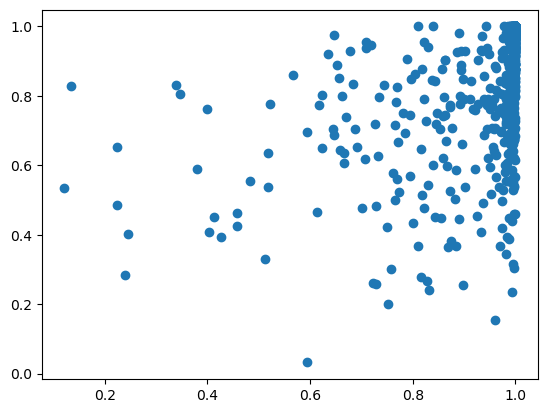

In [23]:
plt.scatter(raxml_real_data['predicted_bootstrap_score_nni'], raxml_real_data['tbe_raxml'])




(array([  2.,   0.,   0.,   2.,   2.,   0.,   0.,   2.,   1.,   3.,   1.,
          2.,   1.,   4.,   0.,   1.,   4.,   6.,   7.,   6.,   9.,   6.,
         11.,  12.,  13.,  17.,  17.,  15.,  29., 620.]),
 array([0.12146764, 0.15074186, 0.18001609, 0.20929031, 0.23856454,
        0.26783876, 0.29711298, 0.32638721, 0.35566143, 0.38493566,
        0.41420988, 0.44348411, 0.47275833, 0.50203256, 0.53130678,
        0.56058101, 0.58985523, 0.61912946, 0.64840368, 0.6776779 ,
        0.70695213, 0.73622635, 0.76550058, 0.7947748 , 0.82404903,
        0.85332325, 0.88259748, 0.9118717 , 0.94114593, 0.97042015,
        0.99969438]),
 <BarContainer object of 30 artists>)

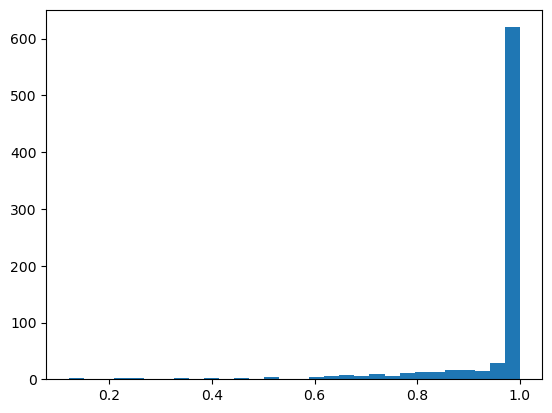

In [25]:
plt.hist(raxml_real_data['predicted_bootstrap_score_nni'], bins=30)


In [27]:
print(np.mean(raxml_real_data['bootstrap_support']))
print(np.mean(raxml_real_data['predicted_bootstrap_score_nni']))

73.2219419924338
0.9489985095692615


In [19]:
raxml_real_data.sort_values('predicted_bootstrap_score_nni')

,Unnamed: 0.1,Unnamed: 0,bootstrap_support,feature_partition_size,feature_partition_divergence,feature_partition_size_ratio,feature_divergence_ratio,feature_mean_bl_bipart,feature_min_bl_bipart,feature_max_bl_bipart,...,extra_FEATURE_extraction_time,total_nni_per_node_FEATURE_extraction_time,total_other_per_node_FEATURE_extraction_time,program,final_tree_topology_path,all_final_tree_topologies_path,program_boot_run_time,tbe_bootstrap,predicted_bootstrap_score_nni,predicted_bootstrap_score_no_nni
604,62,62,53.0,2.0,0.000922,0.013158,2.971800e-04,0.000556,0.000001,0.000921,...,8.245910,1150.669218,4.350852,raxml,/groups/pupko/noaeker/bootstrap_results/real_d...,/groups/pupko/noaeker/bootstrap_results/real_d...,4018,/groups/pupko/noaeker/bootstrap_results/real_d...,0.121468,0.145582
615,73,73,83.0,2.0,0.002983,0.013158,9.614836e-04,0.000964,0.000001,0.002982,...,8.245910,1150.669218,4.350852,raxml,/groups/pupko/noaeker/bootstrap_results/real_d...,/groups/pupko/noaeker/bootstrap_results/real_d...,4018,/groups/pupko/noaeker/bootstrap_results/real_d...,0.133658,0.133245
379,100,100,7.0,10.0,0.562542,0.042194,3.016296e-02,0.026584,0.002386,0.074025,...,8.677718,4440.302796,12.198376,raxml,/groups/pupko/noaeker/bootstrap_results/real_d...,/groups/pupko/noaeker/bootstrap_results/real_d...,8830,/groups/pupko/noaeker/bootstrap_results/real_d...,0.222999,0.288908
470,191,191,15.0,4.0,0.084214,0.016878,4.515474e-03,0.003481,0.002029,0.004681,...,8.677718,4440.302796,12.198376,raxml,/groups/pupko/noaeker/bootstrap_results/real_d...,/groups/pupko/noaeker/bootstrap_results/real_d...,8830,/groups/pupko/noaeker/bootstrap_results/real_d...,0.224256,0.237542
544,2,2,28.0,2.0,0.001094,0.013158,3.526192e-04,0.000274,0.000001,0.000553,...,8.245910,1150.669218,4.350852,raxml,/groups/pupko/noaeker/bootstrap_results/real_d...,/groups/pupko/noaeker/bootstrap_results/real_d...,4018,/groups/pupko/noaeker/bootstrap_results/real_d...,0.240426,0.213225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
721,30,30,100.0,2.0,0.000597,0.028571,3.419489e-04,0.004812,0.000001,0.012697,...,2.032960,133.726637,1.407231,raxml,/groups/pupko/noaeker/bootstrap_results/real_d...,/groups/pupko/noaeker/bootstrap_results/real_d...,954,/groups/pupko/noaeker/bootstrap_results/real_d...,0.999655,0.999658
594,52,52,100.0,2.0,0.000534,0.013158,1.721194e-04,0.006809,0.000001,0.025167,...,8.245910,1150.669218,4.350852,raxml,/groups/pupko/noaeker/bootstrap_results/real_d...,/groups/pupko/noaeker/bootstrap_results/real_d...,4018,/groups/pupko/noaeker/bootstrap_results/real_d...,0.999656,0.999363
169,169,169,100.0,5.0,0.154044,0.026596,1.198895e-02,0.009992,0.003851,0.018110,...,15.041107,4785.169538,6.653026,raxml,/groups/pupko/noaeker/bootstrap_results/real_d...,/groups/pupko/noaeker/bootstrap_results/real_d...,9625,/groups/pupko/noaeker/bootstrap_results/real_d...,0.999673,0.999795
737,46,46,100.0,8.0,0.011539,0.114286,6.609293e-03,0.005527,0.001697,0.014706,...,2.032960,133.726637,1.407231,raxml,/groups/pupko/noaeker/bootstrap_results/real_d...,/groups/pupko/noaeker/bootstrap_results/real_d...,954,/groups/pupko/noaeker/bootstrap_results/real_d...,0.999675,0.999578
